**Table of contents**<a id='toc0_'></a>    
- 1. [Imports](#toc1_)    
- 2. [Model class](#toc2_)    
  - 2.1. [Basic Edgeworth box](#toc2_1_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

## 0. <a id='toc1_'></a>[Imports](#toc0_)

Imports and set magics:

In [5]:
import matplotlib.pyplot as plt
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
plt.rcParams.update({'font.size': 14})

import numpy as np

%load_ext autoreload
%autoreload 2

## 1. <a id='toc2_'></a>[Model class](#toc0_)

**Explain how you solve the model**

In [6]:
from ExchangeEconomy import ExchangeEconomyClass

## 1. <a id='toc2_'></a>[Basic Edgeworth box](#toc0_)

In [8]:
model = ExchangeEconomyClass()
result = model.find_pareto_improvements(N1=76, N2=76)
print(result)

[(0.07894736842105263, 0.9605263157894737), (0.09210526315789473, 0.8947368421052632), (0.09210526315789473, 0.9078947368421053), (0.09210526315789473, 0.9210526315789473), (0.09210526315789473, 0.9342105263157895), (0.09210526315789473, 0.9473684210526315), (0.09210526315789473, 0.9605263157894737), (0.10526315789473684, 0.8289473684210527), (0.10526315789473684, 0.8421052631578947), (0.10526315789473684, 0.8552631578947368), (0.10526315789473684, 0.868421052631579), (0.10526315789473684, 0.881578947368421), (0.10526315789473684, 0.8947368421052632), (0.10526315789473684, 0.9078947368421053), (0.10526315789473684, 0.9210526315789473), (0.10526315789473684, 0.9342105263157895), (0.10526315789473684, 0.9473684210526315), (0.10526315789473684, 0.9605263157894737), (0.11842105263157894, 0.7894736842105263), (0.11842105263157894, 0.8026315789473685), (0.11842105263157894, 0.8157894736842105), (0.11842105263157894, 0.8289473684210527), (0.11842105263157894, 0.8421052631578947), (0.118421052

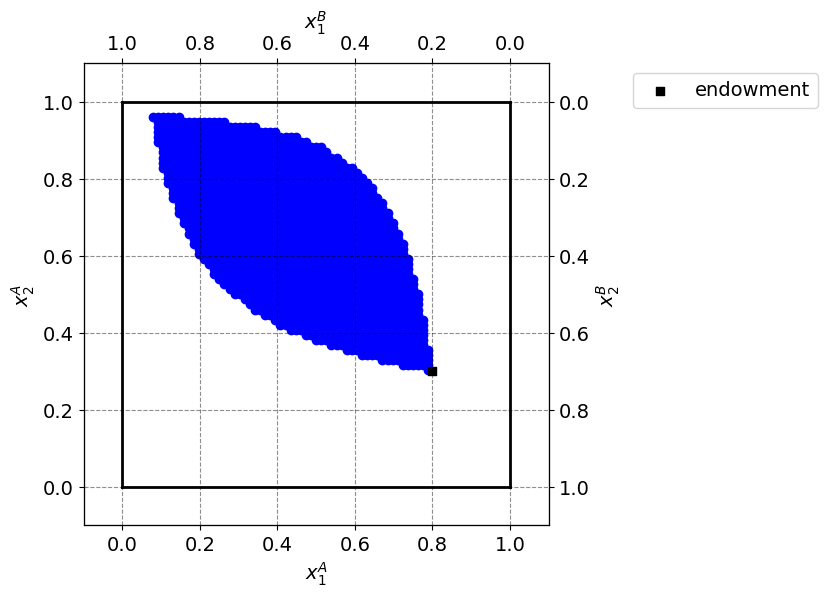

In [27]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
# Plotting all pairs of (x1A, x2A) in the Edgeworth box
for x1A, x2A in result:
    ax_A.scatter(x1A, x2A, marker='o', color='blue')

ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')

# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));

### 2. <a id='toc2_1_'></a>[Check market clearing condition](#toc0_)

In [11]:
p1_values = list(0.5 + 2 * (i / 75) for i in range(76))
p1_values_array = np.array(p1_values)
model.check_market_clearing(p1 = p1_values_array)


(array([ 0.53333333,  0.47594937,  0.42409639,  0.37701149,  0.33406593,
         0.29473684,  0.25858586,  0.22524272,  0.19439252,  0.16576577,
         0.13913043,  0.11428571,  0.09105691,  0.06929134,  0.04885496,
         0.02962963,  0.01151079, -0.00559441, -0.02176871, -0.03708609,
        -0.0516129 , -0.06540881, -0.07852761, -0.09101796, -0.10292398,
        -0.11428571, -0.12513966, -0.13551913, -0.14545455, -0.15497382,
        -0.16410256, -0.17286432, -0.18128079, -0.18937198, -0.1971564 ,
        -0.20465116, -0.21187215, -0.21883408, -0.22555066, -0.23203463,
        -0.23829787, -0.24435146, -0.25020576, -0.25587045, -0.26135458,
        -0.26666667, -0.27181467, -0.27680608, -0.28164794, -0.28634686,
        -0.29090909, -0.2953405 , -0.29964664, -0.30383275, -0.30790378,
        -0.31186441, -0.31571906, -0.31947195, -0.32312704, -0.3266881 ,
        -0.33015873, -0.33354232, -0.33684211, -0.34006116, -0.34320242,
        -0.34626866, -0.34926254, -0.35218659, -0.3

### 3. <a id='toc2_'></a>[Market clearing price](#toc0_)

In [12]:
model.find_equilibrium(p_low = 0.93, p_high = 0.95)
p1=0.94
X1A_opg3, X2A_opg3 = model.demand_A(p1)
X1B_opg3, X2B_opg3 = model.demand_B(p1)

p= 0.50, excess = 0.53
p= 0.53, excess = 0.48
p= 0.55, excess = 0.42
p= 0.58, excess = 0.38
p= 0.61, excess = 0.33
p= 0.63, excess = 0.29
p= 0.66, excess = 0.26
p= 0.69, excess = 0.23
p= 0.71, excess = 0.19
p= 0.74, excess = 0.17
p= 0.77, excess = 0.14
p= 0.79, excess = 0.11
p= 0.82, excess = 0.09
p= 0.85, excess = 0.07
p= 0.87, excess = 0.05
p= 0.90, excess = 0.03
p= 0.93, excess = 0.01
p= 0.95, excess = -0.01
p= 0.98, excess = -0.02
p= 1.01, excess = -0.04
p= 1.03, excess = -0.05
p= 1.06, excess = -0.07
p= 1.09, excess = -0.08
p= 1.11, excess = -0.09
p= 1.14, excess = -0.10
p= 1.17, excess = -0.11
p= 1.19, excess = -0.13
p= 1.22, excess = -0.14
p= 1.25, excess = -0.15
p= 1.27, excess = -0.15
p= 1.30, excess = -0.16
p= 1.33, excess = -0.17
p= 1.35, excess = -0.18
p= 1.38, excess = -0.19
p= 1.41, excess = -0.20
p= 1.43, excess = -0.20
p= 1.46, excess = -0.21
p= 1.49, excess = -0.22
p= 1.51, excess = -0.23
p= 1.54, excess = -0.23
p= 1.57, excess = -0.24
p= 1.59, excess = -0.24
p= 1.62, 

## 4. <a id='toc2_'></a>[Optimization](#toc0_)

### 4.a. <a id='toc2_1_'></a>[Allocation if only prices in P1 can be chosen](#toc0_)

In [19]:
p1_values = list(0.5 + 2 * (i / 75) for i in range(76))
p1_values_array = np.array(p1_values)

utility_best = -np.inf 
bedst_p1 = np.nan

# Iterate over each value of p1
for p1 in p1_values_array:
    # Calculate agent A's demand and B's demand for goods 1 and 2 at price p1
    X1A_opg4a, X2A_opg4a = model.demand_A(p1)  # Use agent A's demand
    X1B_opg4a, X2B_opg4a = model.demand_B(p1)  # Use agent B's demand
    

    # Calculate the utility for agent A using the given formula
    utility = model.utility_A(1-X1B_opg4a, 1-X2B_opg4a)
    
    # Update the best utility and corresponding p1 if the current utility is higher
    if utility > utility_best:
        utility_best = utility
        bedst_p1 = p1
        best_arguments = (X1A_opg4a, X1A_opg4a)  # Save demands directly


print(f'Best utility is {utility_best:.8f} at p1 = {bedst_p1:.8f}')
print(f' optimal allocation for A is as follows, x1: {1-X1B_opg4a:.8f} and x2: {1-X2B_opg4a:.8f}')



Best utility is 0.63361599 at p1 = 1.88666667
 optimal allocation for A is as follows, x1: 0.68000000 and x2: 0.60000000


### 4.b. <a id='toc2_1_'></a>[Allocation if any positive prices can be chosen](#toc0_)

In [16]:

# b) same as in a but with where P>0
p1_values_array = np.linspace(0.0001,10,1000)

utility_best = -np.inf 
bedst_p1 = np.nan

for p1 in p1_values_array:
    # Calculate agent A's demand and B's demand for goods 1 and 2 at price p1
    X1A_opg4b, X2A_opg4b = model.demand_A(p1)  # Use agent A's demand
    X1B_opg4b, X2B_opg4b = model.demand_B(p1)  # Use agent B's demand

    # Calculate the utility for agent A using the given formula
    utility = model.utility_A(1-X1B_opg4b, 1-X2B_opg4b)
    
    # Update the best utility and corresponding p1 if the current utility is higher
    if utility > utility_best:
        utility_best = utility
        bedst_p1 = p1
        best_arguments = (X1A_opg4b, X1A_opg4b)  # Save demands directly

print(f'Best utility is {utility_best:.8f} at p1 = {bedst_p1:.8f}')
print(f' optimal allocation for A is as follows, x1: {1-X1B_opg4b:.8f} and x2: {1-X2B_opg4b:.8f}')


Best utility is 0.63362064 at p1 = 1.90198288
 optimal allocation for A is as follows, x1: 0.82000000 and x2: 0.10000000


## 5. <a id='toc2_'></a>[Optimization](#toc0_)

### 5a. <a id='toc2_1_'></a>[Allocation restricted to C](#toc0_)

In [18]:
model.optimizer()

x1A = 0.7895
x2A = 0.3553
uA  = 0.4636


(0.7894736842105263, 0.35526315789473684, 0.4636027469805233)

### 5b. <a id='toc2_1_'></a>[Allocation if no further restrictions are imposed](#toc0_)

In [228]:
model.solver()

x1A = 0.5757
x2A = 0.8444
uA  = 0.7432


(0.5757450601538892, 0.8444377859258702, 0.7432276287154398)

## 6. <a id='toc2_'></a>[Even more optimization](#toc0_)

### 6a. <a id='toc2_1_'></a>[Allocation when consumption is chosen by social planner](#toc0_)

In [28]:
model.solver_opg6()

x1A = 0.3334
x2A = 0.6668
uA  = 0.5293


(0.3334399256734374, 0.6668016053890844, 0.5292614854006306)

### 6a. <a id='toc2_1_'></a>[Comparing results](#toc0_)

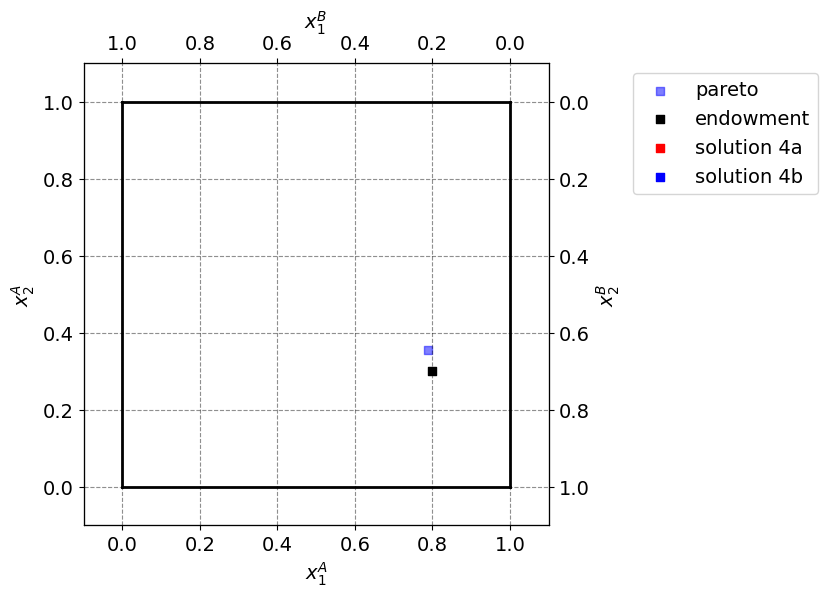

In [35]:
par = model.par

# a. total endowment
w1bar = 1.0
w2bar = 1.0

# b. figure set up
fig = plt.figure(frameon=False,figsize=(6,6), dpi=100)
ax_A = fig.add_subplot(1, 1, 1)

ax_A.set_xlabel("$x_1^A$")
ax_A.set_ylabel("$x_2^A$")

temp = ax_A.twinx()
temp.set_ylabel("$x_2^B$")
ax_B = temp.twiny()
ax_B.set_xlabel("$x_1^B$")
ax_B.invert_xaxis()
ax_B.invert_yaxis()

# A
# Plotting all pairs of (x1A, x2A) in the Edgeworth box
ax_A.scatter(x1A, x2A, marker='s', color='blue', alpha=0.5, label='pareto')
ax_A.scatter(par.w1A,par.w2A,marker='s',color='black',label='endowment')
ax_A.scatter(X1A_opg4a,X2A_opg4a,marker='s',color='red',label='solution 4a')
ax_A.scatter(X1A_opg4b,X2A_opg4b,marker='s',color='blue',label='solution 4b')
#ax_A.scatter(optimal_xA_5b[0],optimal_xA_5b[1],marker='s',color='yellow',label='solution 5b')
#ax_A.scatter(x1A,x2A,marker='s',color='pink',label='solution 6a')


# limits
ax_A.plot([0,w1bar],[0,0],lw=2,color='black')
ax_A.plot([0,w1bar],[w2bar,w2bar],lw=2,color='black')
ax_A.plot([0,0],[0,w2bar],lw=2,color='black')
ax_A.plot([w1bar,w1bar],[0,w2bar],lw=2,color='black')

ax_A.set_xlim([-0.1, w1bar + 0.1])
ax_A.set_ylim([-0.1, w2bar + 0.1])    
ax_B.set_xlim([w1bar + 0.1, -0.1])
ax_B.set_ylim([w2bar + 0.1, -0.1])

ax_A.legend(frameon=True,loc='upper right',bbox_to_anchor=(1.6,1.0));



### 7. <a id='toc2_1_'></a>[Random allocation of endowment](#toc0_)

In [230]:
model.setw(s1 = 50, s2 = 50)

[(0.570517285378466, 0.5044148379192928),
 (0.56452875520484, 0.6037314499177909),
 (0.48844183254450535, 0.8375485848212164),
 (0.3364777534653247, 0.610182460329334),
 (0.3758681778119588, 0.7355727638774857),
 (0.532035868838685, 0.4097661316129019),
 (0.06810628846711264, 0.48964001071929286),
 (0.5845290601966381, 0.5089245204524442),
 (0.23789776342109814, 0.5064823102252063),
 (0.16075658153974937, 0.6183410688703261),
 (0.15211914914792302, 0.8346048167240424),
 (0.12706921895137258, 0.5865653764508133),
 (0.3274411663720117, 0.021307389755686468),
 (0.6941538730112569, 0.7356233589733003),
 (0.358966469406951, 0.9206336566025977),
 (0.8913656558995818, 0.7556772210161681),
 (0.2018798794246912, 0.2847557821358644),
 (0.11060250345361267, 0.949599016350066),
 (0.5275567612904862, 0.839882848029037),
 (0.8676553290111667, 0.8149500045971086),
 (0.2618743783611466, 0.7436777736788525),
 (0.4993951212412697, 0.9148693732520856),
 (0.42856440131602347, 0.8962339825792529),
 (0.5300

### 8. <a id='toc2_1_'></a>[Market equilibrium allocation](#toc0_)

In [ ]:
model.,,